In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [51]:
obesity=pd.read_csv('data0.csv')

In [52]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   obesity_trend         152 non-null    int64  
 1   pop_mean              152 non-null    int64  
 2   total_per             152 non-null    float64
 3   air_per               152 non-null    float64
 4   environ_per           152 non-null    float64
 5   health_per            152 non-null    float64
 6   school_per            152 non-null    float64
 7   media_per             152 non-null    float64
 8   counsel_per           152 non-null    float64
 9   region                152 non-null    object 
 10  local_authority_type  152 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 13.2+ KB


In [53]:
obesity.head()

,obesity_trend,pop_mean,total_per,air_per,environ_per,health_per,school_per,media_per,counsel_per,region,local_authority_type
0,76,177831,0.7816,0.1181,0.1237,0.1012,0.2306,0.1012,0.1068,London,london_borough
1,59,346817,0.6343,0.1442,0.0490,0.0663,0.2134,0.0865,0.0750,London,london_borough
2,46,242883,0.6587,0.1688,0.1853,0.0206,0.1071,0.1194,0.0576,Yorkshire and the Humber,metropolitan_borough
3,6,180311,0.8929,0.1830,0.2329,0.1054,0.2773,0.0555,0.0388,South West,unitary_authority
4,19,164485,0.7903,0.2249,0.3161,0.1033,0.0486,0.0182,0.0790,East of England,unitary_authority


In [54]:
obesity_numeric = pd.get_dummies(obesity)

In [55]:
obesity_numeric.head()

,obesity_trend,pop_mean,total_per,air_per,environ_per,health_per,school_per,media_per,counsel_per,region_East Midlands,...,region_North West,region_South East,region_South West,region_West Midlands,region_Yorkshire and the Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_other_london,local_authority_type_unitary_authority
0,76,177831,0.7816,0.1181,0.1237,0.1012,0.2306,0.1012,0.1068,0,...,0,0,0,0,0,1,0,0,0,0
1,59,346817,0.6343,0.1442,0.0490,0.0663,0.2134,0.0865,0.0750,0,...,0,0,0,0,0,1,0,0,0,0
2,46,242883,0.6587,0.1688,0.1853,0.0206,0.1071,0.1194,0.0576,0,...,0,0,0,0,1,0,1,0,0,0
3,6,180311,0.8929,0.1830,0.2329,0.1054,0.2773,0.0555,0.0388,0,...,0,0,1,0,0,0,0,0,0,1
4,19,164485,0.7903,0.2249,0.3161,0.1033,0.0486,0.0182,0.0790,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
obesity_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   obesity_trend                                 152 non-null    int64  
 1   pop_mean                                      152 non-null    int64  
 2   total_per                                     152 non-null    float64
 3   air_per                                       152 non-null    float64
 4   environ_per                                   152 non-null    float64
 5   health_per                                    152 non-null    float64
 6   school_per                                    152 non-null    float64
 7   media_per                                     152 non-null    float64
 8   counsel_per                                   152 non-null    float64
 9   region_East Midlands                          152 non-null    uin

In [57]:
obesity_final = obesity_numeric.drop(['environ_per', 'region_Yorkshire and the Humber', 'local_authority_type_other_london'], axis=1)
obesity_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   obesity_trend                                 152 non-null    int64  
 1   pop_mean                                      152 non-null    int64  
 2   total_per                                     152 non-null    float64
 3   air_per                                       152 non-null    float64
 4   health_per                                    152 non-null    float64
 5   school_per                                    152 non-null    float64
 6   media_per                                     152 non-null    float64
 7   counsel_per                                   152 non-null    float64
 8   region_East Midlands                          152 non-null    uint8  
 9   region_East of England                        152 non-null    uin

Text(0.5, 1.0, 'Correlation Matrix')

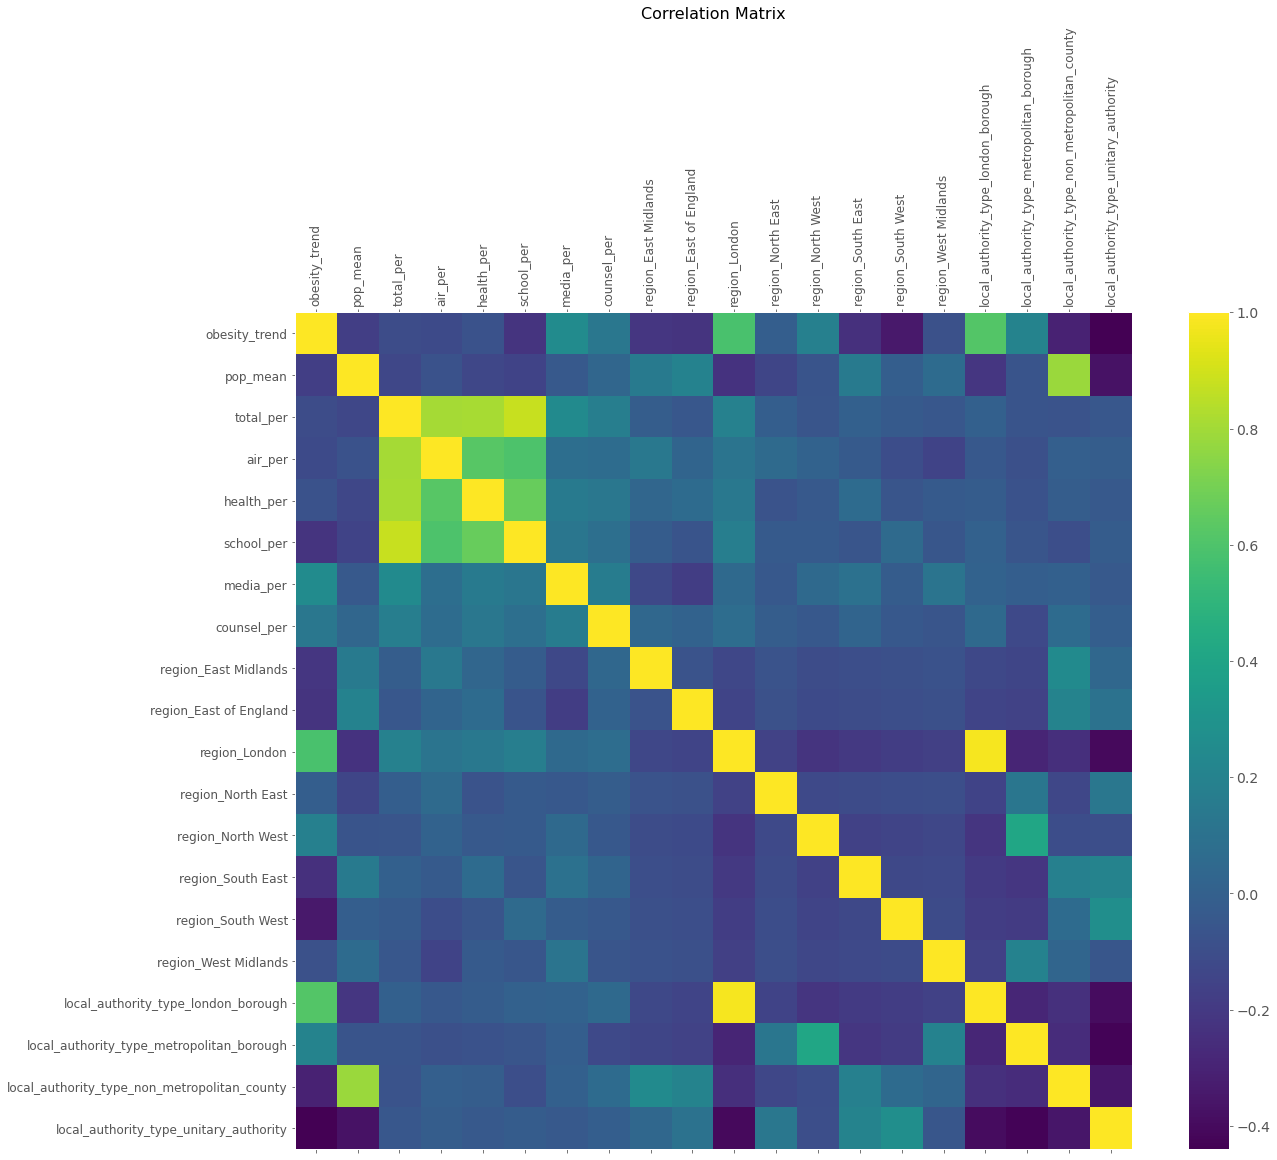

In [58]:
df = obesity_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(20, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
     while True:
        df_with_const = add_constant(df)
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
                           index=df_with_const.columns).to_frame()
        vif_df = vif_df.drop('const')
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break
     
     return df

In [60]:
df_VIF = drop_column_using_vif_(obesity_final.drop('obesity_trend', axis=1))

print("The columns remaining after VIF selection are:")
print(df_VIF.columns)

Dropping: region_London
Dropping: local_authority_type_unitary_authority
Dropping: total_per
The columns remaining after VIF selection are:
Index(['pop_mean', 'air_per', 'health_per', 'school_per', 'media_per',
       'counsel_per', 'region_East Midlands', 'region_East of England',
       'region_North East', 'region_North West', 'region_South East',
       'region_South West', 'region_West Midlands',
       'local_authority_type_london_borough',
       'local_authority_type_metropolitan_borough',
       'local_authority_type_non_metropolitan_county'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [69]:
np.std(df_VIF, axis=0)

pop_mean                                                                   277,427.5884
air_per                                                                          0.1105
health_per                                                                       0.0550
school_per                                                                       0.1728
media_per                                                                        0.0429
counsel_per                                                                      0.0262
region_East Midlands                                                             0.2360
region_East of England                                                           0.2591
region_North East                                                                0.2697
region_North West                                                                0.3584
region_South East                                                                0.3307
region_South West               

In [61]:
model_obesity = sm.OLS(endog=obesity_final[['obesity_trend']], exog=sm.add_constant(df_VIF)).fit()
model_obesity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          obesity_trend   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     25.56
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           3.70e-33
Time:                        19:59:34   Log-Likelihood:                -599.54
No. Observations:                 152   AIC:                             1233.
Df Residuals:                     135   BIC:                             1284.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           16.2873      6.042      2.696      0.008       4.339      28.236
pop_mean                                      1.036e-05   6.67e-06      1.552      0.123   -2.84e-06    2.36e-05
air_per                                         -2.2107     13.931     -0.159      0.874     -29.763      25.341
health_per                                      89.1430     30.031      2.968      0.004      29.752     148.534
school_per                                     -57.2880      9.272     -6.179      0.000     -75.625     -38.951
media_per                                      138.1118     26.907      5.133      0.000      84.898     191.326
counsel_per                                     92.9616     42.439      2.190      0.030       9.030     176.893
region_East Midlands                           -16.1127      6.130     -2.628      0.010     -28.236      -3.989
region_East of England                         -17.3858      5.862     -2.966      0.004     -28.980      -5.792
region_North East                               -1.8867      5.198     -0.363      0.717     -12.166       8.393
region_North West                                4.8572      4.410      1.101      0.273      -3.865      13.580
region_South East                              -17.1497      5.106     -3.359      0.001     -27.247      -7.052
region_South West                              -18.6233      5.201     -3.581      0.000     -28.910      -8.337
region_West Midlands                           -13.0191      5.046     -2.580      0.011     -22.999      -3.039
local_authority_type_london_borough             31.9358      4.644      6.877      0.000      22.751      41.120
local_authority_type_metropolitan_borough       11.6164      3.594      3.232      0.002       4.508      18.724
local_authority_type_non_metropolitan_county    -7.8243      5.109     -1.532      0.128     -17.928       2.280
==============================================================================
Omnibus:                        9.391   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               17.458
Skew:                          -0.206   Prob(JB):                     0.000162
Kurtosis:                       4.608   Cond. No.                     1.80e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
model_obesity.params

const                                                                           16.2873
pop_mean                                                                         0.0000
air_per                                                                         -2.2107
health_per                                                                      89.1430
school_per                                                                     -57.2880
media_per                                                                      138.1118
counsel_per                                                                     92.9616
region_East Midlands                                                           -16.1127
region_East of England                                                         -17.3858
region_North East                                                               -1.8867
region_North West                                                                4.8572
region_South East               

In [63]:
model_obesity.bse

const                                                                            6.0417
pop_mean                                                                         0.0000
air_per                                                                         13.9314
health_per                                                                      30.0306
school_per                                                                       9.2720
media_per                                                                       26.9071
counsel_per                                                                     42.4391
region_East Midlands                                                             6.1301
region_East of England                                                           5.8623
region_North East                                                                5.1978
region_North West                                                                4.4104
region_South East               

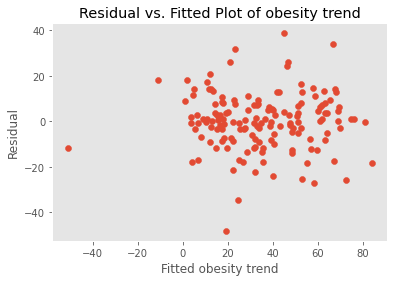

In [64]:
plt.scatter(model_obesity.fittedvalues, model_obesity.resid)

plt.xlabel('Fitted obesity trend')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity trend')
plt.show()

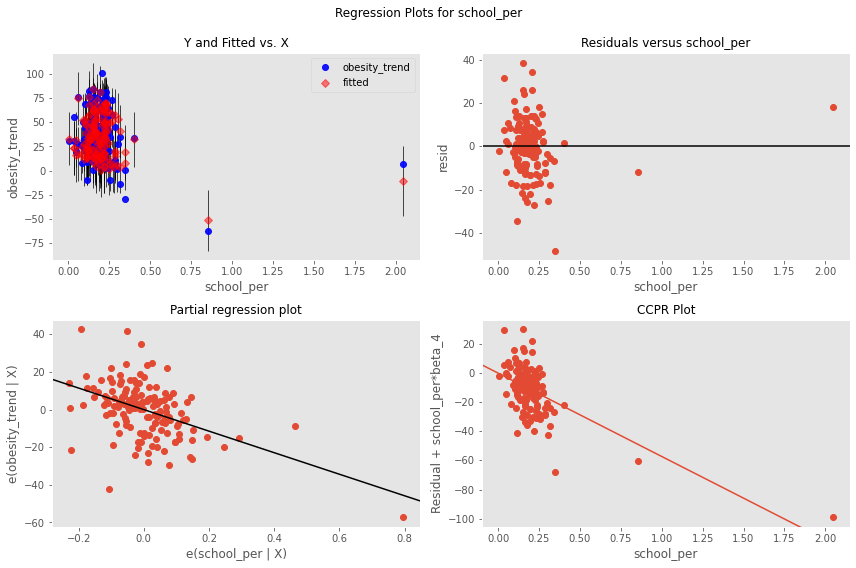

In [65]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_obesity, 'school_per', fig=fig)

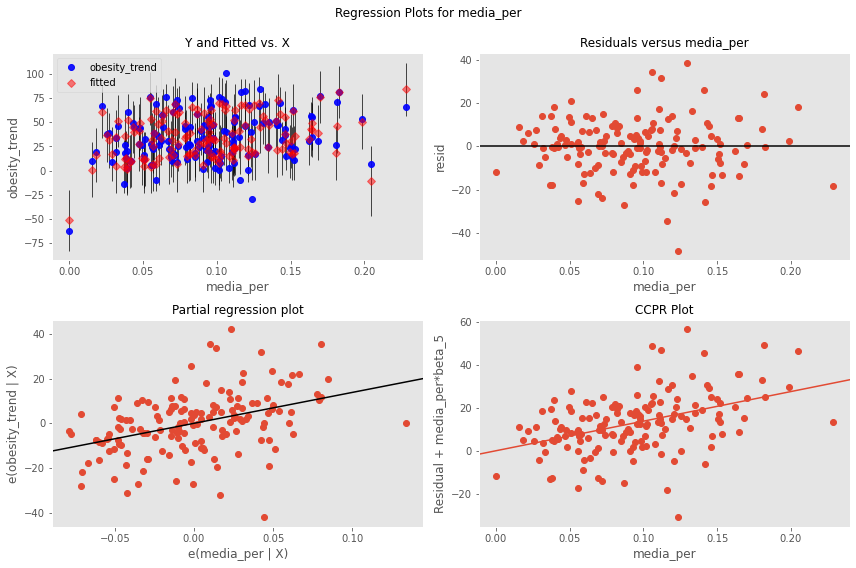

In [66]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_obesity, 'media_per', fig=fig)

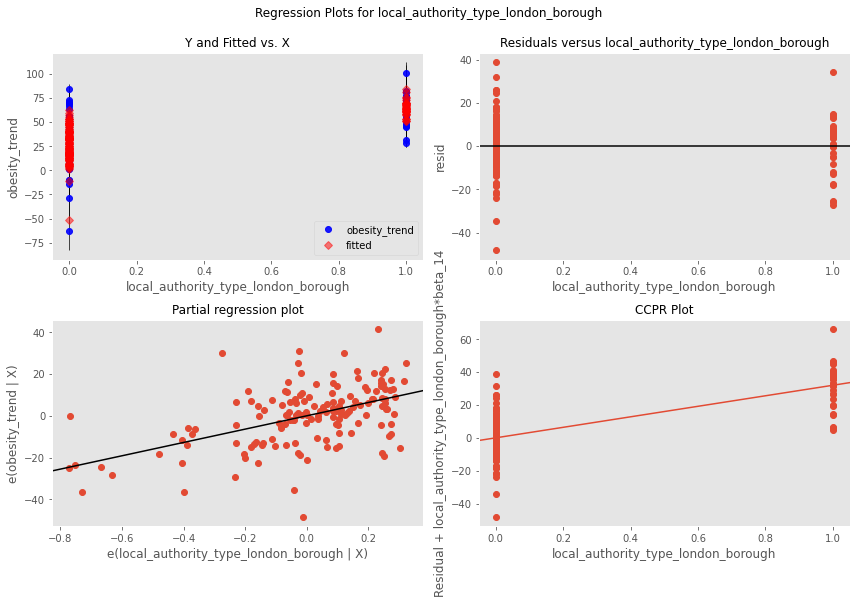

In [67]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_obesity, 'local_authority_type_london_borough', fig=fig)